In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree
import json
import re
import multiprocessing
# import xlwt
import time
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'

# 爬取top200

In [2]:
#总分榜单
jinjiang = 'https://www.jjwxc.net/topten.php?orderstr=7&t=1'
#'https://www.jjwxc.net/bookbase_slave.php?t=0&booktype=&opt=&page=1&endstr=true&orderstr=4'

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                        'AppleWebKit/537.36 (KHTML, like Gecko) '
                        'Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.55'}
response = requests.get(jinjiang, headers=header)
print(response.status_code)

200


In [285]:
# change to Chinese
response.encoding = response.apparent_encoding

# print(response.text)

In [443]:
htmls = etree.HTML(response.text)
htmls

<Element html at 0x278a8e8e880>

In [141]:
# 清洗+提取信息
# Xpath
htmls = etree.HTML(response.text)
# book_name = htmls.xpath('//a[@class="tooltip"]/text()')
# print(book_name)

# print(htmls.xpath('//tbody//td//a/text()')) # author + title

# print(htmls.xpath('//tbody//td[2]//a/@href')) #
# print(htmls.xpath('//tbody//td[2]//a/@title')) # author
ls_author = htmls.xpath('//tbody//td[2]//a/@title')
ls_author_href = htmls.xpath('//tbody//td[2]//a/@href')

# print(htmls.xpath('//a[@class="tooltip"]/@rel')) #
# print(htmls.xpath('//a[@class="tooltip"]/@title')) # title
# print(htmls.xpath('//a[@class="tooltip"]/@href')) #
ls_title = htmls.xpath('//a[@class="tooltip"]/@title')
ls_title_href = htmls.xpath('//a[@class="tooltip"]/@href')
ls_rel = htmls.xpath('//a[@class="tooltip"]/@rel')

# print(htmls.xpath('//tbody//td[@align="center"][3]/text()')) # style (轻松 or 正剧)
# print(htmls.xpath('//tbody//td[@align="center"][5]/text()')) # time
ls_style = []
for style in htmls.xpath('//tbody//td[@align="center"][3]/text()'):
    st = str(style).strip(' ')
    ls_style.append(st)
    # print(len(st))
ls_time = htmls.xpath('//tbody//td[@align="center"][5]/text()')

# print(htmls.xpath('//tbody//td[@align="right"][1]/text()')) # words
# print(htmls.xpath('//tbody/tr/td[8]/text()')) # credits
ls_credits = htmls.xpath('//tbody/tr/td[8]/text()')[2:]
ls_words = []
for word in htmls.xpath('//tbody//td[@align="right"][1]/text()'):
    wd = str(word).strip(' ')
    ls_words.append(int(wd))
    # print(len(wd))

In [247]:

# print(htmls.xpath('//tbody/tr/td[8]/text()')[2:]) # credits

In [101]:
# bs = BeautifulSoup(response.text, 'lxml')
# print(bs)

# 正则表达式吧。。。。

In [295]:
# create pandas frame

dic = {'author': ls_author, 'author_link': ls_author_href,
       'title': ls_title, 'book_link': ls_title_href, 'intro': ls_rel,
       'time': ls_time, 'style': ls_style, 'words_num': ls_words,
       'credits': ls_credits}
df = pd.DataFrame(dic)

df['year'] = df['time'].str.extract('(^\d{4})', expand=True)
print(df)

    author                    author_link       title  \
0      木苏里  oneauthor.php?authorid=966799        全球高考   
1      木苏里  oneauthor.php?authorid=966799          某某   
2       淮上  oneauthor.php?authorid=294665          破云   
3       淮上  oneauthor.php?authorid=294665       破云2吞海   
4      木苏里  oneauthor.php?authorid=966799          判官   
..     ...                            ...         ...   
195    青梅酱  oneauthor.php?authorid=423251     电竞魔王集结营   
196    春风遥  oneauthor.php?authorid=976658  天雷能有什么坏心思呢   
197     巫哲  oneauthor.php?authorid=570049     我就是来借个火   
198    林知落  oneauthor.php?authorid=494127    虐渣剧情引起舒适   
199     龙柒  oneauthor.php?authorid=729526     想飞升就谈恋爱   

                       book_link  \
0    onebook.php?novelid=3419133   
1    onebook.php?novelid=3173202   
2    onebook.php?novelid=3395943   
3    onebook.php?novelid=3617495   
4    onebook.php?novelid=3515679   
..                           ...   
195  onebook.php?novelid=4079467   
196  onebook.php?novelid=60

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       200 non-null    object
 1   author_link  200 non-null    object
 2   title        200 non-null    object
 3   book_link    200 non-null    object
 4   intro        200 non-null    object
 5   time         200 non-null    object
 6   style        200 non-null    object
 7   words_num    200 non-null    int64 
 8   credits      200 non-null    object
 9   year         200 non-null    object
dtypes: int64(1), object(9)
memory usage: 15.8+ KB


In [153]:
# write to excel

# df.to_excel('danmei.xlsx', index=False)

# 数据分析
## 整体分析

In [ ]:
# 简易过滤

df['year'].values
ls_year = list(int(i[0]) for i in df[['year']].values.tolist())
# ls_year

In [ ]:
ls_rwat = [*zip(range(1, 201), ls_words, ls_author, ls_title, ls_style, ls_year)]
ls_rwat

In [288]:
stop = 5
cnt = 0
for ele in ls_rwat:
    # if cnt != stop:
    #     print(ele)
    #     cnt += 1

    # if ele[1] == max(ls_words):
    #     print('字数最多的作品：', ele)
    # if ele[1] == min(ls_words):
    #     print('字数最少的作品：', ele)
    # if ele[1] <= 300000:
    #     print('少于30w：', ele)
    if ele[1] >= 2000000:
        print('多于200w：', ele)

    # if ele[-1] <= 2014:
    #     print('2014年及以前的作品：', ele)
    # if ele[-1] == 2014:
    #     print('2012年: ', ele,'//n')

    # if ele[2] == '巫哲':
    #     print(ele)

    # if ele[-2] == "爆笑":
    #     print(ele)

多于200w： (11, 2573685, '壶鱼辣椒', '我在无限游戏里封神', '正剧', 2020)
多于200w： (41, 3803424, '燕孤鸿', '无限旅游团', '轻松', 2021)
多于200w： (54, 3000369, '君sola', '探虚陵现代篇', '正剧', 2012)
多于200w： (77, 2389790, '蝶之灵', '卡牌密室（重生）', '轻松', 2019)
多于200w： (111, 2536794, '鱼危', '开局给魏尔伦戴了顶环保帽', '正剧', 2020)
多于200w： (183, 6266586, '席未来', '容修[娱乐圈]', '轻松', 2019)
多于200w： (192, 4037427, '衣落成火', '我有药啊[系统]', '轻松', 2015)


In [286]:
# 前二百小说-作者出现次数统计

df_author = df[['author_link', 'author']].groupby('author').agg('count')

df_author1 = df_author.loc[df_author['author_link'] > 1]
# df_author1
# .plot(kind='bar')

In [7]:
df_author1.sort_values('author_link', inplace=True, ascending=False)

C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\1355188211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_author1.sort_values('author_link', inplace=True, ascending=False)


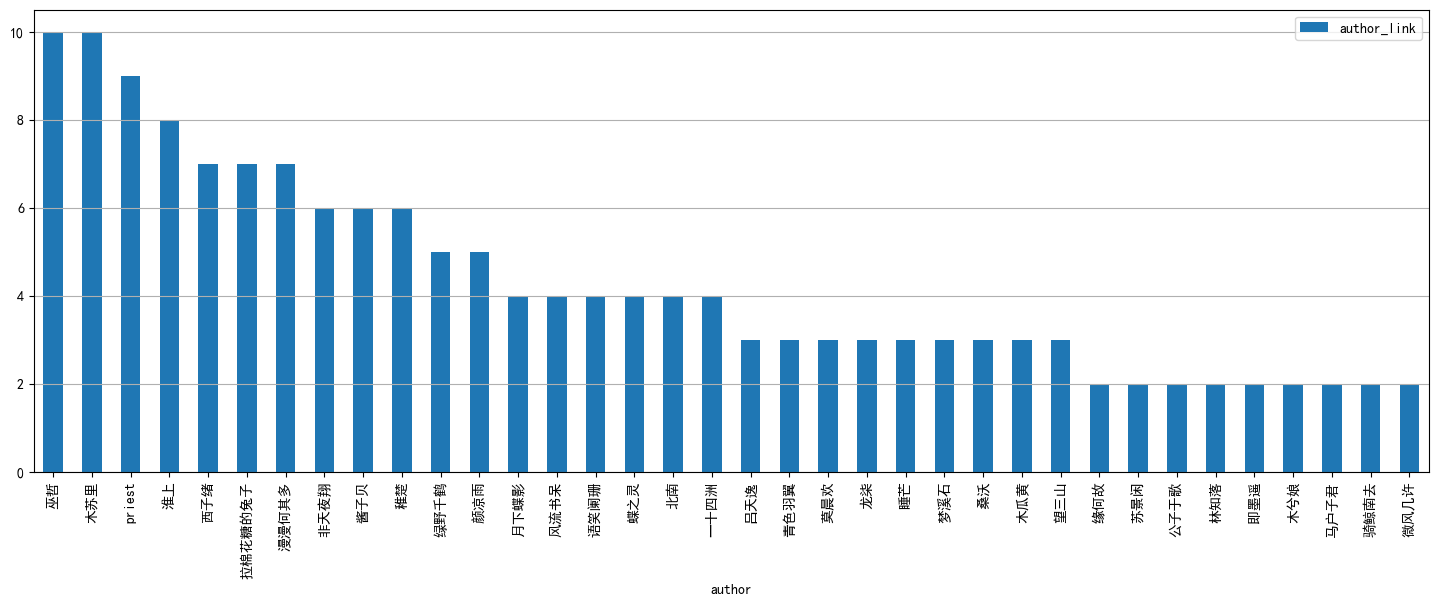

In [225]:
df_author1.plot(kind='bar', figsize=(18, 6))
plt.grid(axis='y')
# plt.savefig('year_author', bbox_inches='tight')

In [9]:
# 前二百小说类型统计

df_style = df[['style', 'title']].groupby('style').agg('count')
df_style

,title
style,
正剧,66
爆笑,5
轻松,129


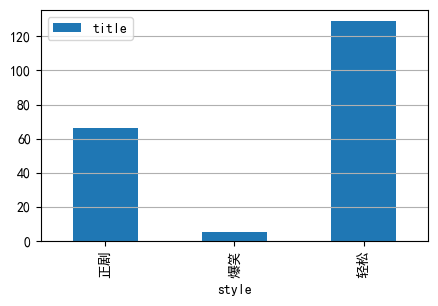

In [226]:
df_style.plot(kind='bar', figsize=(5, 3))
plt.grid(axis='y')
plt.savefig('./images/style', bbox_inches='tight')

In [11]:
# 发布年份统计

df_time = df[['time', 'year']]
df_year = df_time.groupby('year').agg('count')
df_year

,time
year,
2012,1
2013,2
2014,4
2015,12
2016,15
2017,22
2018,37
2019,38
2020,39


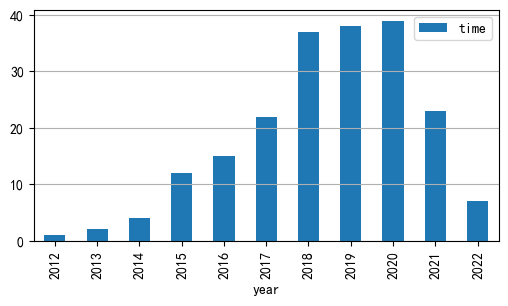

In [228]:
df_year.plot(kind='bar', figsize=(6, 3))
plt.grid(axis='y')
plt.savefig('./images/year', bbox_inches='tight')

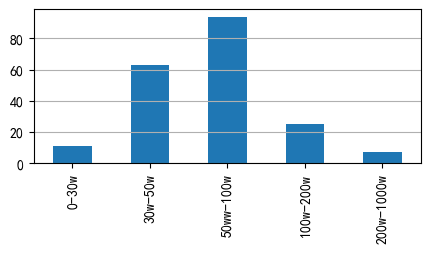

In [230]:
# 字数统计
# words

# 组间距离
bins = [0, 300000, 500000, 1000000, 2000000, 10000000]
agesgroup = pd.cut(ls_words, bins)
nn = agesgroup.value_counts()
nn.plot(kind='bar', figsize=(5, 2))
plt.grid(axis="y")
# 更改横坐标的名字
plt.xticks(range(0, 5, 1), ('0-30w', '30w-50w', '50ww-100w', '100w-200w', '200w-1000w'))

# plt.grid(axis='y')
# plt.savefig('./images/words', bbox_inches='tight')

In [155]:
nn

(0, 300000]            11
(300000, 500000]       63
(500000, 1000000]      94
(1000000, 2000000]     25
(2000000, 10000000]     7
dtype: int64

## 两者之间的关系

### 字数和排名之间的

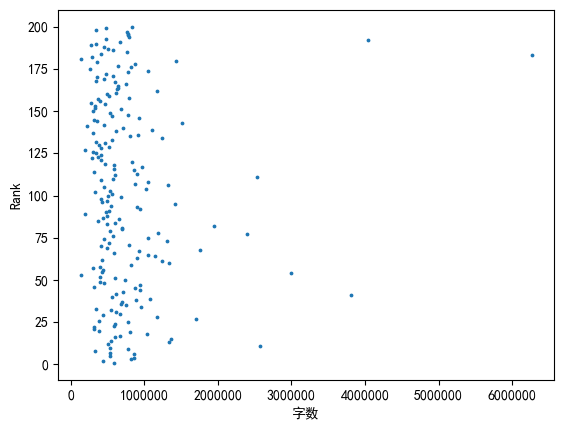

In [232]:
# 字数and rank

import numpy as np

np.set_printoptions(suppress=True, formatter={'float_kind': '{:.4f}'.format})
# 字数排名的散点图
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
# ax.scatter([*reversed(ls_words)], [*reversed(range(1, 201))], s=3)
ax.scatter(ls_words, range(1, 201), s=3)
# ax.set_xticks(np.arange(0,7000000,700000))

# plt.figure(figsize=(5, 3))
# plt.scatter(ls_words, range(1, 201))
plt.xlabel('字数')
plt.ylabel('Rank')
# plt.xticks(np.arange(0,7000000,700000))
# plt.grid(axis='y')
# plt.savefig('./images/words_rank', bbox_inches='tight')





### 年份与style

In [17]:
# 近些年style的变化

df1 = df[['year', 'style', 'author']]
df11 = df1.groupby(['year', 'style']).agg('count')

In [18]:
df11

author
year style        
2012 正剧          1
2013 正剧          2
2014 正剧          3
     轻松          1
2015 正剧          5
     轻松          7
2016 正剧          9
     轻松          6
2017 正剧          9
     轻松         13
2018 正剧          9
     爆笑          1
     轻松         27
2019 正剧         11
     爆笑          1
     轻松         26
2020 正剧         10
     爆笑          2
     轻松         27
2021 正剧          6
     爆笑          1
     轻松         16
2022 正剧          1
     轻松          6

In [36]:
# type(df11)
# df11.columns
ls_df11idx = []
for idx in df11.index:
    ls_df11idx.append(idx)
ls_df11idx

[('2012', '正剧'),
 ('2013', '正剧'),
 ('2014', '正剧'),
 ('2014', '轻松'),
 ('2015', '正剧'),
 ('2015', '轻松'),
 ('2016', '正剧'),
 ('2016', '轻松'),
 ('2017', '正剧'),
 ('2017', '轻松'),
 ('2018', '正剧'),
 ('2018', '爆笑'),
 ('2018', '轻松'),
 ('2019', '正剧'),
 ('2019', '爆笑'),
 ('2019', '轻松'),
 ('2020', '正剧'),
 ('2020', '爆笑'),
 ('2020', '轻松'),
 ('2021', '正剧'),
 ('2021', '爆笑'),
 ('2021', '轻松'),
 ('2022', '正剧'),
 ('2022', '轻松')]

In [67]:
df11_del_idx = df11.reset_index()
type(df11_del_idx)

# df11_del_idx[['author']].values.tolist()

ls_value = list(int(i[0]) for i in df11_del_idx[['author']].values.tolist())
ls_value

[1, 2, 3, 1, 5, 7, 9, 6, 9, 13, 9, 1, 27, 11, 1, 26, 10, 2, 27, 6, 1, 16, 1, 6]

In [68]:
dic_yt = dict(zip(ls_df11idx, ls_value))
dic_yt

{('2012', '正剧'): 1,
 ('2013', '正剧'): 2,
 ('2014', '正剧'): 3,
 ('2014', '轻松'): 1,
 ('2015', '正剧'): 5,
 ('2015', '轻松'): 7,
 ('2016', '正剧'): 9,
 ('2016', '轻松'): 6,
 ('2017', '正剧'): 9,
 ('2017', '轻松'): 13,
 ('2018', '正剧'): 9,
 ('2018', '爆笑'): 1,
 ('2018', '轻松'): 27,
 ('2019', '正剧'): 11,
 ('2019', '爆笑'): 1,
 ('2019', '轻松'): 26,
 ('2020', '正剧'): 10,
 ('2020', '爆笑'): 2,
 ('2020', '轻松'): 27,
 ('2021', '正剧'): 6,
 ('2021', '爆笑'): 1,
 ('2021', '轻松'): 16,
 ('2022', '正剧'): 1,
 ('2022', '轻松'): 6}

In [236]:
aim_years = [*range(2012, 2023)]
aim_types = ['正剧', '爆笑', '轻松']

ls_check = []
for y in aim_years:
    for t in aim_types:
        ls_check.append((str(y), str(t)))
        # print(y, t)
ls_check

[('2012', '正剧'),
 ('2012', '爆笑'),
 ('2012', '轻松'),
 ('2013', '正剧'),
 ('2013', '爆笑'),
 ('2013', '轻松'),
 ('2014', '正剧'),
 ('2014', '爆笑'),
 ('2014', '轻松'),
 ('2015', '正剧'),
 ('2015', '爆笑'),
 ('2015', '轻松'),
 ('2016', '正剧'),
 ('2016', '爆笑'),
 ('2016', '轻松'),
 ('2017', '正剧'),
 ('2017', '爆笑'),
 ('2017', '轻松'),
 ('2018', '正剧'),
 ('2018', '爆笑'),
 ('2018', '轻松'),
 ('2019', '正剧'),
 ('2019', '爆笑'),
 ('2019', '轻松'),
 ('2020', '正剧'),
 ('2020', '爆笑'),
 ('2020', '轻松'),
 ('2021', '正剧'),
 ('2021', '爆笑'),
 ('2021', '轻松'),
 ('2022', '正剧'),
 ('2022', '爆笑'),
 ('2022', '轻松')]

In [237]:
for checker in ls_check:
    if dic_yt.get(checker) == None:
        dic_yt[checker] = 0

In [265]:
dic_yt

{('2012', '正剧'): 1,
 ('2013', '正剧'): 2,
 ('2014', '正剧'): 3,
 ('2014', '轻松'): 1,
 ('2015', '正剧'): 5,
 ('2015', '轻松'): 7,
 ('2016', '正剧'): 9,
 ('2016', '轻松'): 6,
 ('2017', '正剧'): 9,
 ('2017', '轻松'): 13,
 ('2018', '正剧'): 9,
 ('2018', '爆笑'): 1,
 ('2018', '轻松'): 27,
 ('2019', '正剧'): 11,
 ('2019', '爆笑'): 1,
 ('2019', '轻松'): 26,
 ('2020', '正剧'): 10,
 ('2020', '爆笑'): 2,
 ('2020', '轻松'): 27,
 ('2021', '正剧'): 6,
 ('2021', '爆笑'): 1,
 ('2021', '轻松'): 16,
 ('2022', '正剧'): 1,
 ('2022', '轻松'): 6,
 ('2012', '轻松'): 0,
 ('2012', '爆笑'): 0,
 ('2013', '轻松'): 0,
 ('2013', '爆笑'): 0,
 ('2014', '爆笑'): 0,
 ('2015', '爆笑'): 0,
 ('2016', '爆笑'): 0,
 ('2017', '爆笑'): 0,
 ('2022', '爆笑'): 0}

In [289]:
# df_test = pd.DataFrame(dic_yt.values(), index=pd.Index(dic_yt.keys()), columns=['cnt'])
# df_test
#

In [290]:
# df_a1 = df_test.reset_index().set_axis(['year','style','cnt'], axis='columns').set_index('year').groupby(['year','style']).agg('sum')
# df_a1

In [291]:
# df_a2 = df_a1.T
# # df_a2.plot.bar()
# df_a2

In [239]:
data = []
ayear = []

for k in sorted(dic_yt):
    ayear.append(dic_yt[k])
    # print(k[1])
    if len(ayear) == 3:
        data.append(ayear)
        ayear = []
data

[[1, 0, 0],
 [2, 0, 0],
 [3, 0, 1],
 [5, 0, 7],
 [9, 0, 6],
 [9, 0, 13],
 [9, 1, 27],
 [11, 1, 26],
 [10, 2, 27],
 [6, 1, 16],
 [1, 0, 6]]

In [240]:
columns = pd.Index(aim_types, name='Style')
df_yt = pd.DataFrame(data, index=aim_years, columns=columns)

In [242]:
df_yt

Style,正剧,爆笑,轻松
2012,1,0,0
2013,2,0,0
2014,3,0,1
2015,5,0,7
2016,9,0,6
2017,9,0,13
2018,9,1,27
2019,11,1,26
2020,10,2,27
2021,6,1,16


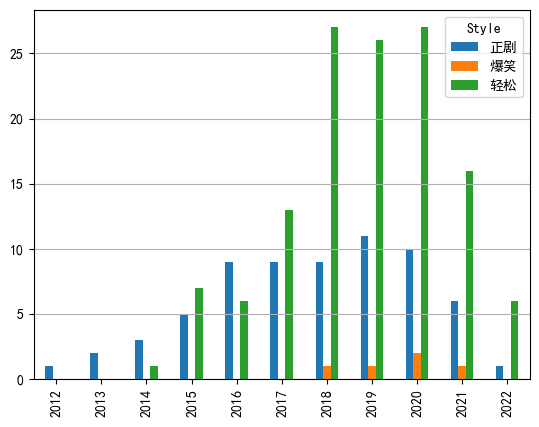

In [243]:
df_yt.plot.bar()
plt.grid(axis='y')
# plt.savefig('./images/year_style', bbox_inches='tight')

In [101]:
# df_test = pd.DataFrame({'year':dic_yt.keys(),'style':dic_yt.keys(),'count':dic_yt.values()})


## 作者分析
每一年的字数

###  整合

C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\711467876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['words_num'] = df_a['words_num'].astype(int)
C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\711467876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['year'] = df_a['year'].astype(int)
C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\711467876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

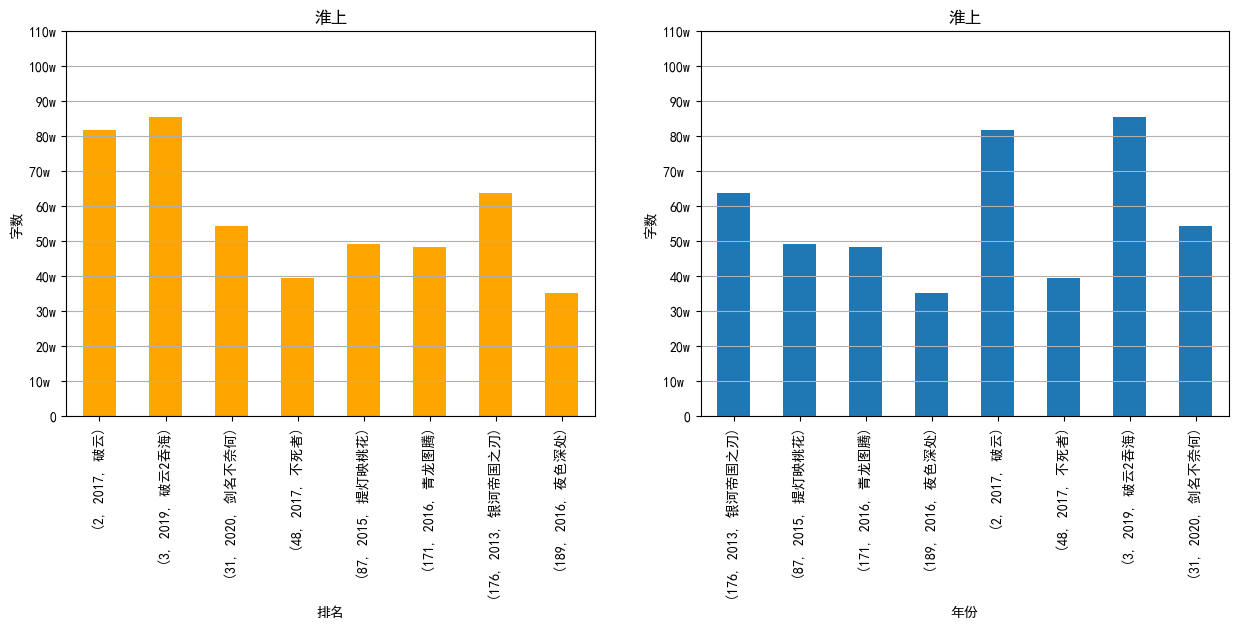

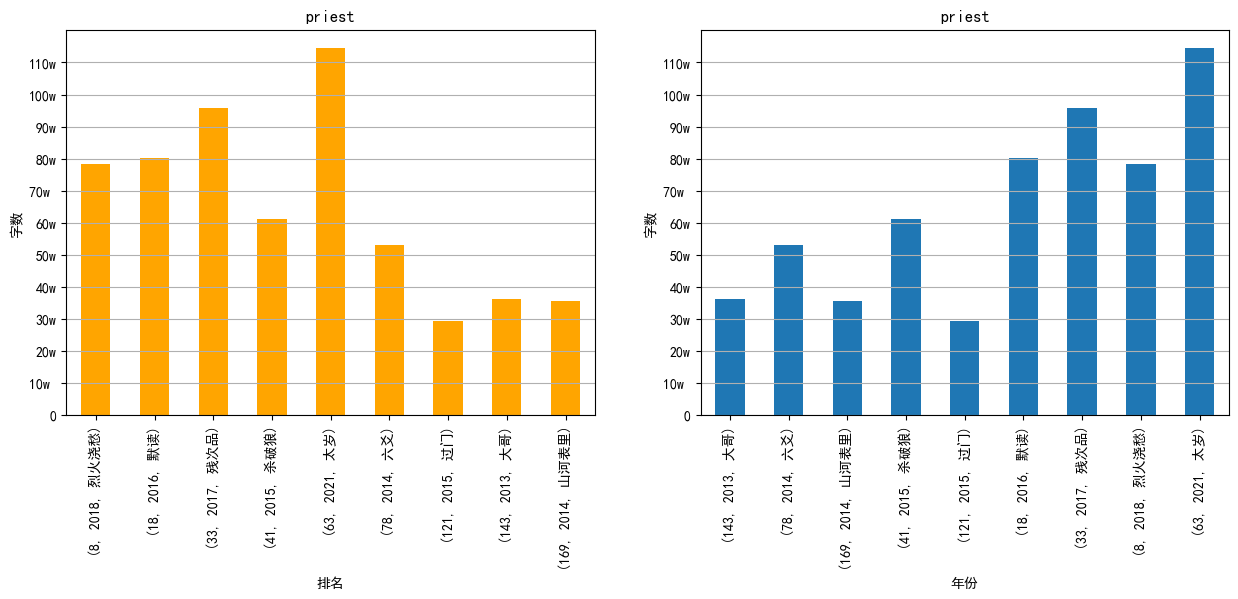

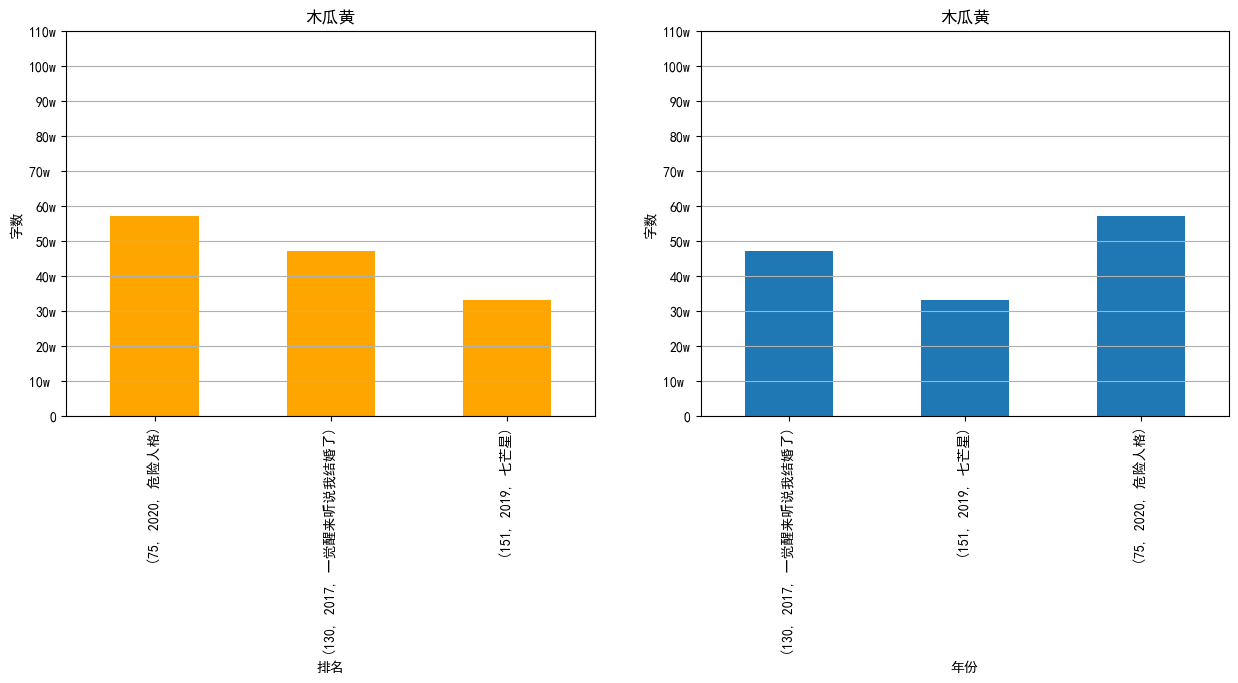

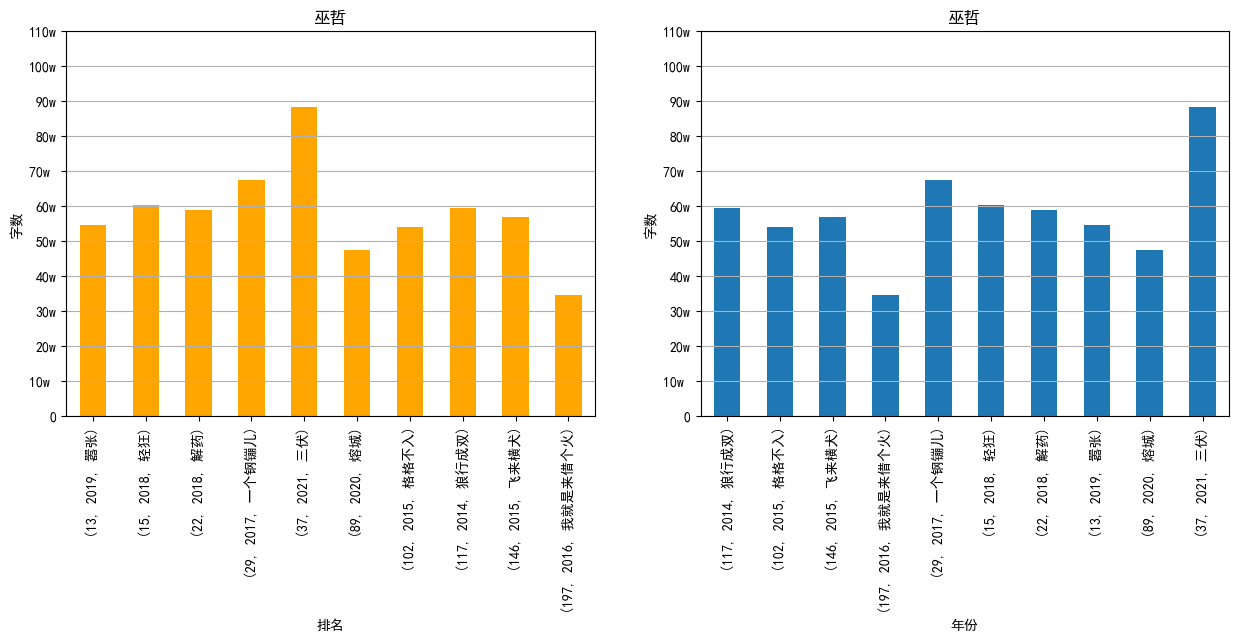

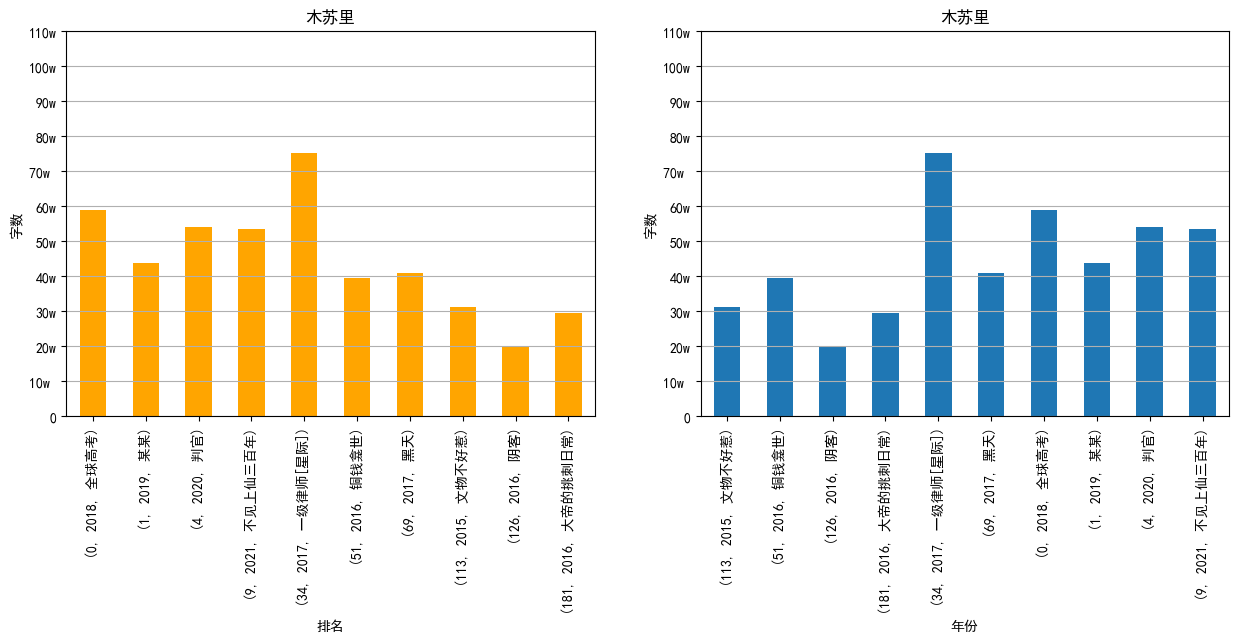

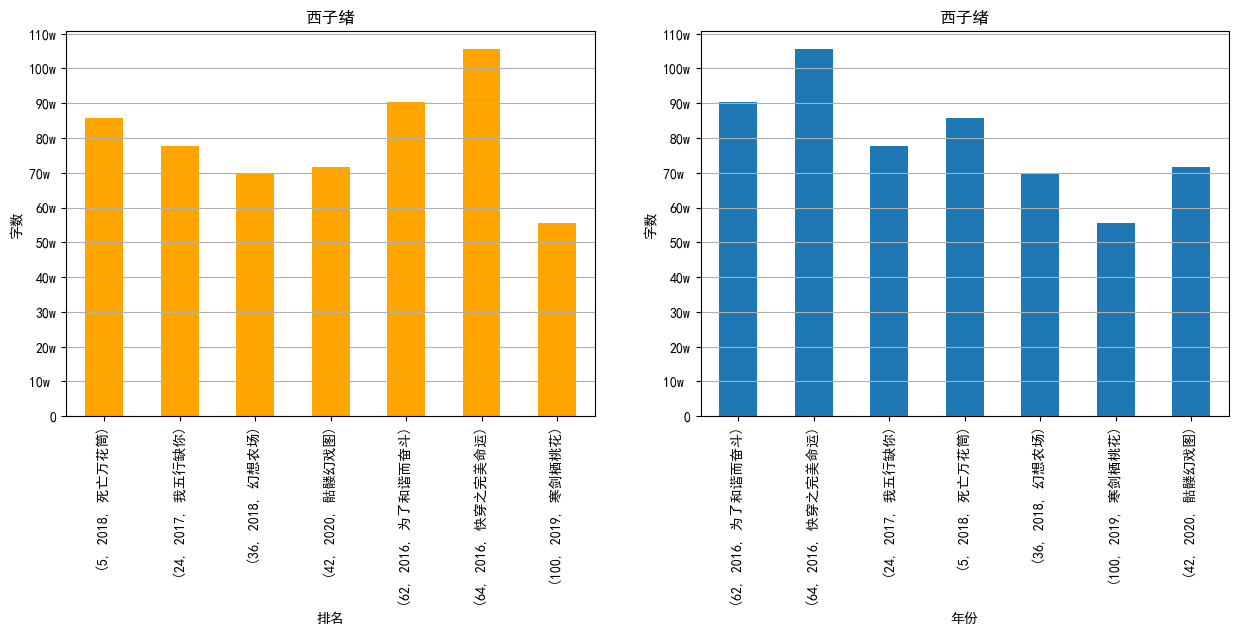

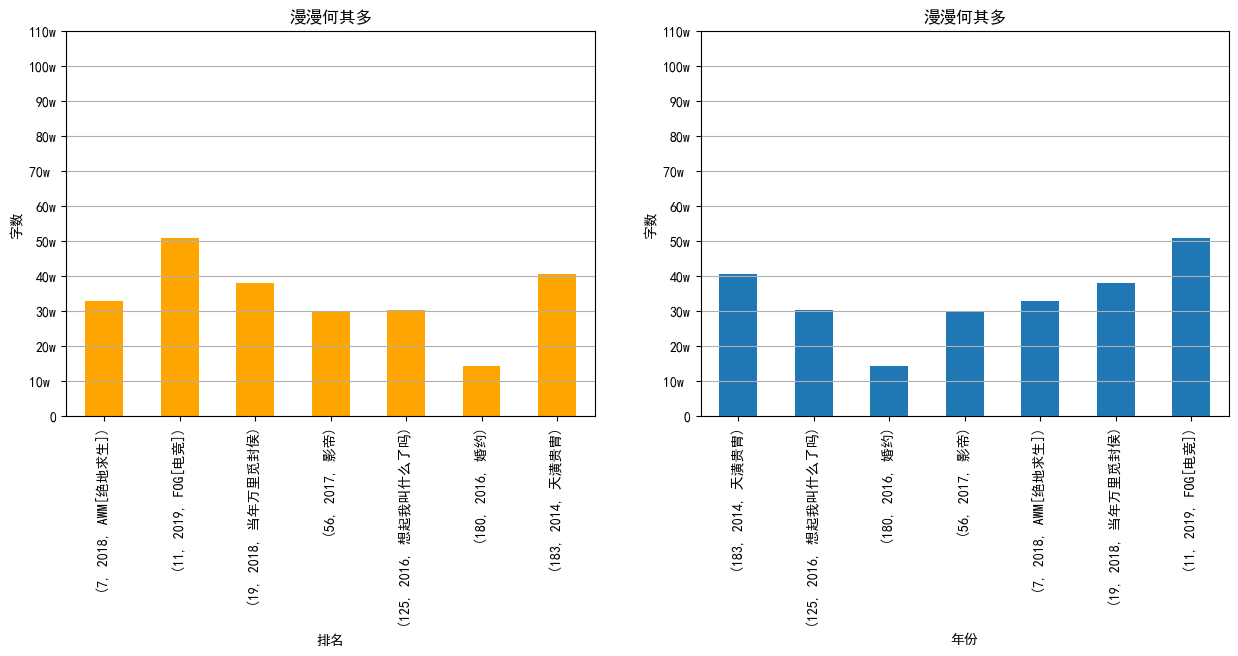

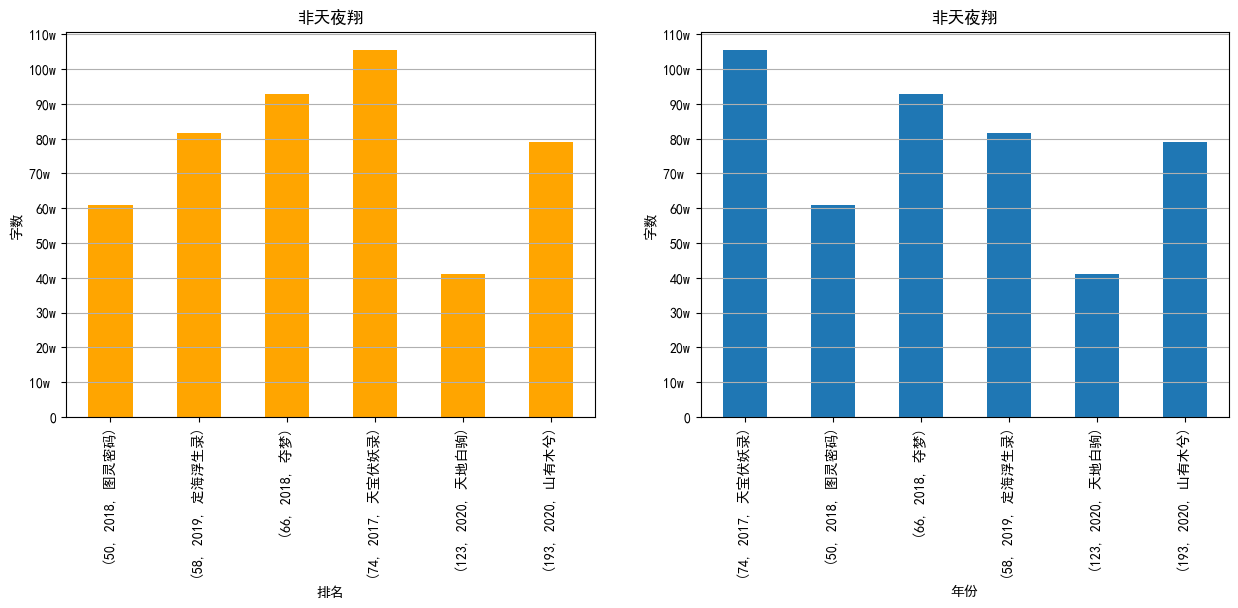

In [441]:
wanted_author = ['淮上', 'priest', '木瓜黄', '巫哲', '木苏里', '西子绪', '漫漫何其多', '非天夜翔']
ls_total_w = []
ls_ave_w = []

for a in wanted_author:
    df_a = df[df['author'] == a]
    # 转换数据类型
    df_a['words_num'] = df_a['words_num'].astype(int)
    df_a['year'] = df_a['year'].astype(int)
    # 提取总字数，平均字数
    df_aa = df_a[['year', 'title', 'words_num']]
    total_w = df_aa['words_num'].sum()
    average_w = df_aa['words_num'].sum() / df_aa['words_num'].count()
    ls_total_w.append(total_w)
    ls_ave_w.append(average_w)
    # 画图
    fig = plt.figure(figsize=(15, 5))
    # Divide the figure into a 1x2 grid, and give me the first section
    ax1 = fig.add_subplot(121)
    # 从左到右--按排名
    df_aa.reset_index().set_index(['index', 'year', 'title']).plot.bar(color='orange', legend=None, ax=ax1)
    plt.xlabel('排名')
    plt.ylabel('字数')
    plt.title(a)
    plt.yticks(range(0, 1200000, 100000), ('0', '10w ', '20w', '30w', '40w',
                                           '50w', '60w', '70w ', '80w',
                                           '90w', '100w', '110w'))
    plt.grid(axis='y')
    ## plt.savefig('./images/{}_rank'.format(str(a)), bbox_inches='tight')  # 紧致

    ax2 = fig.add_subplot(122)
    # 从左到右--按年份
    df_aa.reset_index().sort_values(by=['year']).set_index(['index', 'year', 'title']).plot.bar(legend=None, ax=ax2)
    plt.xlabel('年份')
    plt.ylabel('字数')
    plt.title(a)
    plt.yticks(range(0, 1200000, 100000), ('0', '10w ', '20w', '30w', '40w',
                                           '50w', '60w', '70w ', '80w',
                                           '90w', '100w', '110w'))
    plt.grid(axis='y')
    # plt.savefig('./images/{}'.format(str(a)), bbox_inches='tight')  # 紧致


In [403]:
# 平均字数 and 总字数分析
df_w = pd.DataFrame([ls_total_w, ls_ave_w], columns=wanted_author,
                    index=pd.Index(['total', 'average']))
df_w

,淮上,priest,木瓜黄,巫哲,木苏里,西子绪,漫漫何其多,非天夜翔
total,4571794.00,5.836935e+06,1.367260e+06,5822547.0,4460342.0,5.564039e+06,2.377196e+06,4.607891e+06
average,571474.25,6.485483e+05,4.557533e+05,582254.7,446034.2,7.948627e+05,3.395994e+05,7.679818e+05


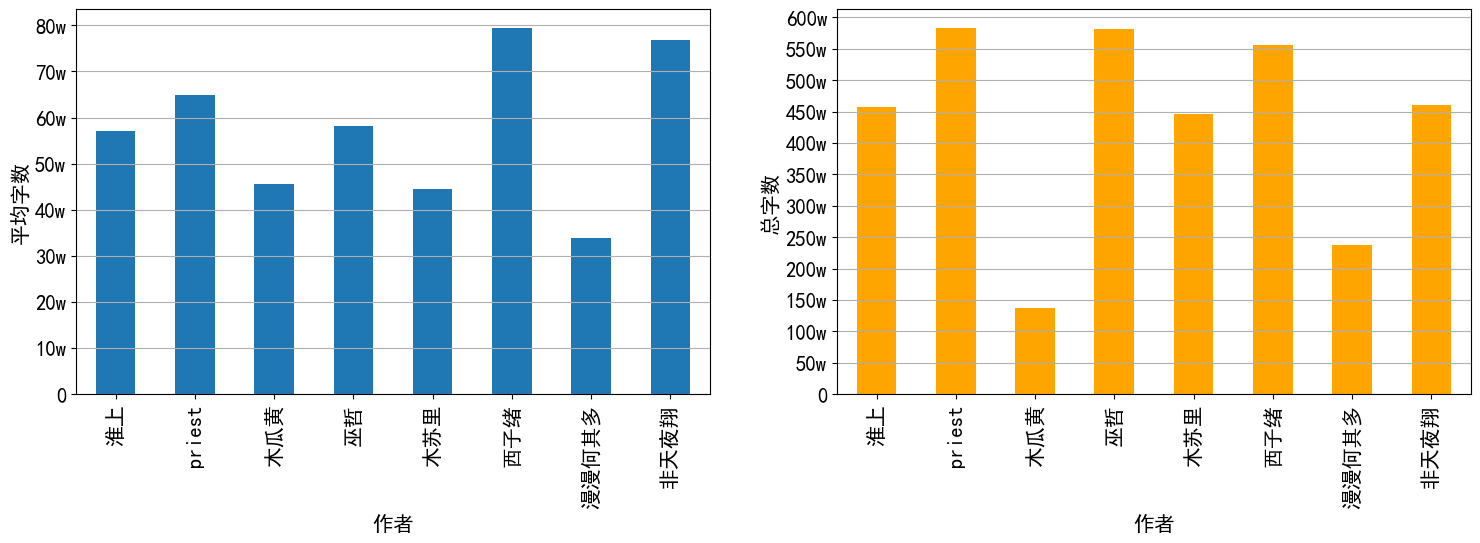

In [439]:
fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(121)
df_w.T[['average']].plot.bar(ax=ax1, legend=None)
plt.xlabel('作者', fontsize=15)
plt.ylabel('平均字数', fontsize=15)
plt.grid(axis='y')
plt.yticks(range(0, 900000, 100000),
           ('0', '10w', '20w', '30w', '40w', '50w', '60w', '70w', '80w'),
           size=15)
plt.xticks(size=15)

ax2 = fig.add_subplot(122)
df_w.T[['total']].plot.bar(ax=ax2, legend=None,color='orange')
plt.xlabel('作者', fontsize=15)
plt.ylabel('总字数', fontsize=15)
plt.grid(axis='y')
plt.yticks(range(0, 6500000, 500000),
           ('0', '50w', '100w', '150w', '200w', '250w',
            '300w', '350w', '400w', '450w', '500w',
            '550w', '600w'), size=15)
plt.xticks(size=15)


# plt.savefig('./images/平均_总字数', bbox_inches='tight')  # 紧致


In [361]:
ls_total_w

[4571794, 5836935, 1367260, 5822547, 4460342, 5564039, 2377196, 4607891]

In [362]:
ls_ave_w

[571474.25,
 648548.3333333334,
 455753.3333333333,
 582254.7,
 446034.2,
 794862.7142857143,
 339599.4285714286,
 767981.8333333334]

### 逐步分析

In [316]:

df2 = df[df['author'] == '淮上']

df2

,author,author_link,title,book_link,intro,time,style,words_num,credits,year
2,淮上,oneauthor.php?authorid=294665,破云,onebook.php?novelid=3395943,<br>城市天空，诡云奔涌<br>三年前恭州市的缉毒行动中，因总指挥江停判断失误，现场发生...,2017-12-15 12:36:06,正剧,817364,"30,403,174,400 \r\n ...",2017
3,淮上,oneauthor.php?authorid=294665,破云2吞海,onebook.php?novelid=3617495,<br>那些窥探的触角隐藏在互联网浪潮中，无处不在，生生不息，正逐渐将现代社会的每个角落淹...,2019-05-10 16:25:13,正剧,855167,"29,915,947,008 \r\n ...",2019
31,淮上,oneauthor.php?authorid=294665,剑名不奈何,onebook.php?novelid=4918054,<br>传说天下第一人徐霜策有一幅亡妻遗像，但没人知道画像背面，是当年被徐霜策亲手诛杀的那位...,2020-12-24 16:25:53,正剧,543360,"13,457,442,816 \r\n ...",2020
48,淮上,oneauthor.php?authorid=294665,不死者,onebook.php?novelid=3165753,"<br>""当主耶稣第二次降临时，那在基督里死了的人，必先从坟墓中复活。”<br>——《帖撒罗...",2017-04-19 18:00:37,正剧,395724,"10,387,367,936 \r\n ...",2017
87,淮上,oneauthor.php?authorid=294665,提灯映桃花,onebook.php?novelid=2555721,都市现耽狗血酸爽小白文，强取豪夺虐恋情深豪门恩怨相爱相杀俗套HE<br> <br>曾见周灵...,2015-09-25 18:25:01,正剧,490608,"7,313,325,568 \r\n ...",2015
171,淮上,oneauthor.php?authorid=294665,青龙图腾,onebook.php?novelid=2790439,<br>但使龙城飞将在，不教胡马度阴山<br>前期凛然正气禁欲刚毅出家人后期身世揭晓还俗末...,2016-08-29 20:36:12,正剧,482011,"4,917,053,440 \r\n ...",2016
176,淮上,oneauthor.php?authorid=294665,银河帝国之刃,onebook.php?novelid=1904453,<br>“朕征战百年，所向披靡，唯有统帅一人不可战胜……统帅威名犹在，而联盟已然溃败。从今...,2013-09-01 21:24:20,正剧,637468,"4,780,791,808 \r\n ...",2013
189,淮上,oneauthor.php?authorid=294665,夜色深处,onebook.php?novelid=2676887,<br>我用了这么多年，才再次站到你面前<br>其实只想说一句，我很想你<br>你呢<br...,2016-02-10 19:50:02,正剧,350092,"4,665,909,248 \r\n ...",2016


In [315]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 189
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       8 non-null      object
 1   author_link  8 non-null      object
 2   title        8 non-null      object
 3   book_link    8 non-null      object
 4   intro        8 non-null      object
 5   time         8 non-null      object
 6   style        8 non-null      object
 7   words_num    8 non-null      object
 8   credits      8 non-null      object
 9   year         8 non-null      object
dtypes: object(10)
memory usage: 704.0+ bytes


In [319]:
# 转换数据类型
df2['words_num'] = df2['words_num'].astype(int)
df2['year'] = df2['year'].astype(int)
# df2['words_num'].astype(int)

C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\3231789299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['words_num'] = df2['words_num'].astype(int)
C:\Users\Julia\AppData\Local\Temp\ipykernel_1640\3231789299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['year'].astype(int)


In [321]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 2 to 189
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       8 non-null      object
 1   author_link  8 non-null      object
 2   title        8 non-null      object
 3   book_link    8 non-null      object
 4   intro        8 non-null      object
 5   time         8 non-null      object
 6   style        8 non-null      object
 7   words_num    8 non-null      int32 
 8   credits      8 non-null      object
 9   year         8 non-null      int32 
dtypes: int32(2), object(8)
memory usage: 640.0+ bytes


In [396]:
# fig, axs = plt.subplots(1, 2)

([<matplotlib.axis.YTick at 0x2789bde6290>,
 [Text(0, 0, '0'),
  Text(0, 100000, '十万 '),
  Text(0, 200000, '二十万'),
  Text(0, 300000, '三十万'),
  Text(0, 400000, '四十万'),
  Text(0, 500000, '五十万'),
  Text(0, 600000, '六十万'),
  Text(0, 700000, '七十万 '),
  Text(0, 800000, '八十万'),
  Text(0, 900000, '九十万'),
  Text(0, 1000000, '一百万'),
  Text(0, 1100000, '一百一十万')])

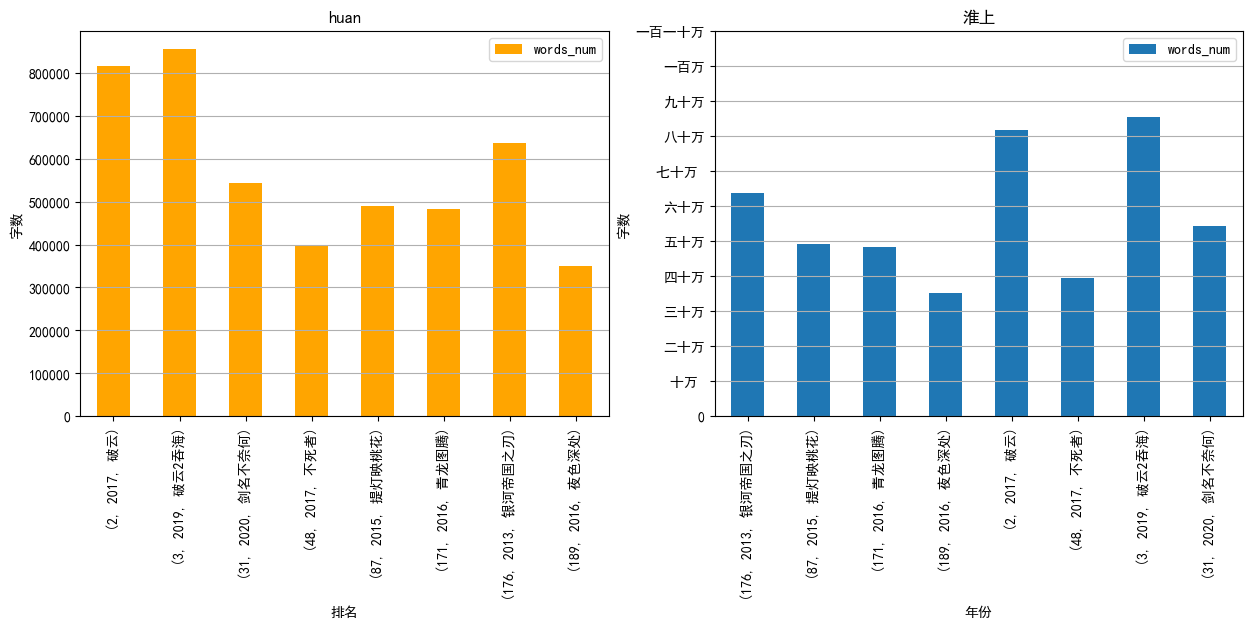

In [419]:
fig = plt.figure(figsize=(15, 5))
# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

df22 = df2[['year', 'title', 'words_num']]
# 从左到右--按排名
df22.reset_index().set_index(['index', 'year', 'title']).plot.bar(color='orange', ax=ax1)
plt.xlabel('排名')
plt.ylabel('字数')
plt.title('huan')
plt.grid(axis='y')

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)
# 从左到右--按年份
df22.reset_index().sort_values(by=['year']).set_index(['index', 'year', 'title']).plot.bar(ax=ax2)
plt.xlabel('年份')
plt.ylabel('字数')
plt.title('淮上')
plt.grid(axis='y')
plt.yticks(range(0, 1200000, 100000), ('0', '十万 ', '二十万', '三十万', '四十万',
                                       '五十万', '六十万', '七十万 ', '八十万',
                                       '九十万', '一百万', '一百一十万'))

571474.25